In [339]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [340]:
n_task_per_file = 20
n_files = 10
base_dir = "noise_sd=1/vary_r_noisesd_1.0_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [341]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [342]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,0.857143,0.666667,0.500000,0.666667,0.500000,0.833333,0.833333,0.500000
1,0.833333,0.500000,0.833333,0.166667,0.500000,0.666667,0.500000,0.857143
2,1.000000,0.833333,0.833333,0.857143,0.714286,0.833333,0.666667,0.333333
3,1.000000,1.000000,0.500000,0.428571,0.666667,0.714286,0.666667,0.666667
4,1.000000,1.000000,0.600000,0.800000,0.600000,0.833333,0.400000,0.600000
...,...,...,...,...,...,...,...,...
10,1.000000,0.571429,1.000000,0.833333,0.714286,1.000000,0.800000,0.428571
11,0.833333,1.000000,0.500000,0.833333,1.000000,1.000000,0.833333,0.500000
12,1.000000,1.000000,0.833333,0.833333,1.000000,0.833333,0.666667,1.000000
13,1.000000,0.714286,1.000000,0.666667,0.714286,1.000000,0.666667,0.833333


In [343]:
length_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,7.881040,5.209677,5.027372,3.898673,3.562433,3.504265,3.027291,3.151105
1,6.865179,5.048507,4.190216,3.817132,3.831720,3.125533,3.040454,2.852603
2,6.575117,5.078002,4.906453,4.593380,4.059971,3.439203,3.348805,2.892985
3,6.824675,4.313650,4.400769,4.120167,3.251878,3.446727,2.942538,3.097699
4,6.003158,3.577200,3.523991,3.408401,3.024426,3.255187,2.963389,2.548818
...,...,...,...,...,...,...,...,...
10,9.419345,6.564715,4.448780,3.647022,3.927948,3.695200,2.828861,3.162214
11,7.297355,4.271995,3.975869,3.871702,3.538984,3.794934,3.058159,2.781292
12,8.191075,4.566727,4.370412,3.908652,3.481787,3.504823,3.400841,2.798733
13,6.160676,4.566281,4.173922,3.616948,3.930679,3.181976,3.262649,2.622855


In [344]:
MSE_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,5.099341,4.470659,4.749366,4.519107,4.790274,4.612161,4.716596,4.767396
1,4.594842,4.454604,4.272533,4.539768,4.605258,4.455933,4.367280,4.382477
2,4.720261,4.637741,4.602204,4.411590,4.693325,4.835533,4.545212,4.802044
3,5.251753,5.052439,4.917542,4.893801,4.672628,5.297046,4.952004,5.217405
4,3.949075,4.111491,4.008867,4.360243,4.257752,4.452203,3.978853,4.135936
...,...,...,...,...,...,...,...,...
10,3.782881,3.752871,3.870722,3.840207,3.994923,4.183115,4.256868,3.742185
11,5.495595,5.168924,5.324331,5.797864,5.699822,4.844421,5.197374,5.288872
12,4.703011,4.900167,4.845371,4.635525,4.301173,4.697558,4.640497,4.704632
13,4.054724,4.039083,4.850827,4.963247,4.296857,4.830382,4.548410,4.965950


In [345]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,20)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1    0.852089
0.2    0.796113
0.3    0.640460
0.4    0.669938
0.5    0.680693
0.6    0.717914
0.7    0.709459
0.8    0.671429
dtype: float64
Length :
 0.1    7.406674
0.2    4.992606
0.3    4.400829
0.4    4.071268
0.5    3.746550
0.6    3.473555
0.7    3.153979
0.8    2.867224
dtype: float64
MSE :
 0.1    4.724875
0.2    4.672418
0.3    4.687803
0.4    4.652819
0.5    4.640740
0.6    4.697244
0.7    4.620670
0.8    4.669732
dtype: float64


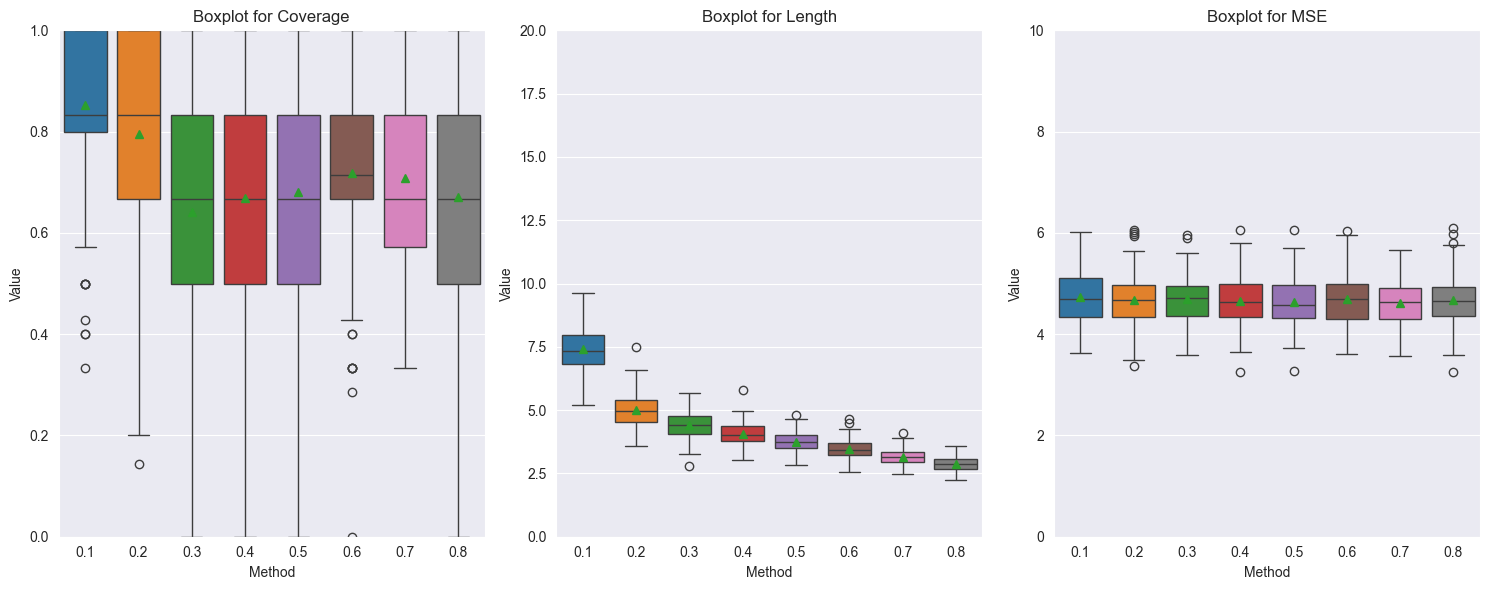

In [346]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

Coverage :
 5.00     0.883546
10.00    0.875410
20.00    0.813921
0.05     0.647558
0.10     0.468267
0.20     0.422766
dtype: float64
Length :
 5.00     1.747530
10.00    1.741557
20.00    1.741194
0.05     1.689401
0.10     1.598789
0.20     1.482754
dtype: float64
MSE :
 5.00     5.306567
10.00    5.354769
20.00    5.337974
0.05     5.398139
0.10     5.367357
0.20     5.329066
dtype: float64


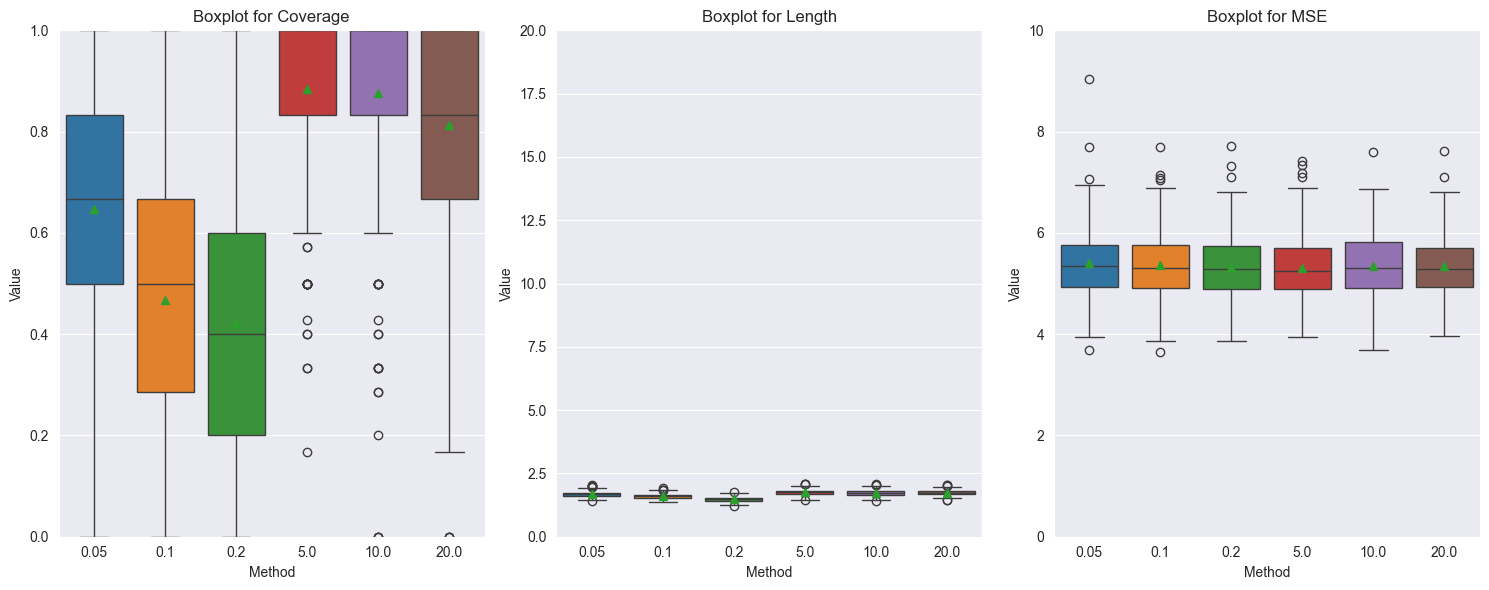

In [178]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [155]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,0.833333,0.833333,1.000000,1.000000,0.500000
2,0.500000,0.833333,1.000000,0.333333,0.833333,0.833333
3,0.833333,1.000000,0.857143,0.500000,0.833333,1.000000
4,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
4,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
5,0.833333,1.000000,1.000000,0.857143,0.600000,0.833333
6,1.000000,1.000000,1.000000,0.800000,0.833333,1.000000
7,1.000000,1.000000,1.000000,0.166667,1.000000,0.800000
